In [1]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
#Rutas
path = 'Data/'

In [3]:
european_football = pd.read_csv(path+'european_football.csv', delimiter=';', 
                                decimal=',')

In [4]:
european_football.head(5)

,Div,Mes,Probabilidad,LocalVisitante,JuegaEuropa,MundialOEurocopa,GanaFavorito
0,P1,1,1.099989,1,1,0,1
1,P1,5,1.099989,1,1,0,1
2,P1,8,1.149954,1,1,0,1
3,P1,9,1.149954,1,1,0,1
4,P1,10,1.149954,1,1,0,1


In [5]:
european_football.dtypes

Div                  object
Mes                   int64
Probabilidad        float64
LocalVisitante        int64
JuegaEuropa           int64
MundialOEurocopa      int64
GanaFavorito          int64
dtype: object

In [5]:
dummies = pd.get_dummies(european_football, columns=['Div', 'Mes'])

In [6]:
dummies.head()

,Probabilidad,LocalVisitante,JuegaEuropa,MundialOEurocopa,GanaFavorito,Div_D1,Div_E0,Div_F1,Div_I1,Div_P1,...,Mes_3,Mes_4,Mes_5,Mes_6,Mes_7,Mes_8,Mes_9,Mes_10,Mes_11,Mes_12
0,1.099989,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.099989,1,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1.149954,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1.149954,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1.149954,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [7]:
columns = list(dummies.columns)

In [8]:
columns.remove('GanaFavorito')

In [9]:
columns

['Probabilidad',
 'LocalVisitante',
 'JuegaEuropa',
 'MundialOEurocopa',
 'Div_D1',
 'Div_E0',
 'Div_F1',
 'Div_I1',
 'Div_P1',
 'Div_SP1',
 'Mes_1',
 'Mes_2',
 'Mes_3',
 'Mes_4',
 'Mes_5',
 'Mes_6',
 'Mes_7',
 'Mes_8',
 'Mes_9',
 'Mes_10',
 'Mes_11',
 'Mes_12']

### K NEAREST NEIGHBORS

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
X = dummies[columns].values

In [12]:
y = dummies["GanaFavorito"] #Hace 0 y 1

In [13]:
clf = KNeighborsClassifier(n_neighbors=150)

In [14]:
clf.fit(X, y) #entrenamos

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=150, p=2,
           weights='uniform')

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=150, p=2,
           weights='uniform')

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test, clf.predict(X_test))

0.57943696450428395

In [23]:
clf.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#Vamos a ver en un gráfico, 

In [48]:
X2 = dummies[['LocalVisitante','Probabilidad']].values

In [49]:
h = .01
x_min, x_max = X2[:, 0].min() - 0.1, X2[:, 0].max() + .1
y_min, y_max = X2[:, 1].min() - .1, X2[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.scatter(xx,yy, c=Z)
plt.xlabel('Cuota')
plt.ylabel('Mes')

ValueError: query data dimension must match training data dimension

Average precision-recall score: 0.64


Text(0.5,1,'2-class Precision-Recall curve: AP=0.64')

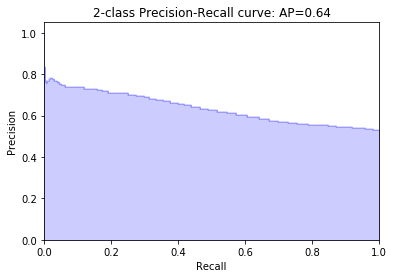

In [21]:
from sklearn.metrics import precision_recall_curve

y_score = clf.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_score)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [ ]:
#Curve ROC

In [22]:
from sklearn.metrics import roc_curve, auc

In [24]:
actual = y_test
predictions = clf.predict(X_test)

In [26]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

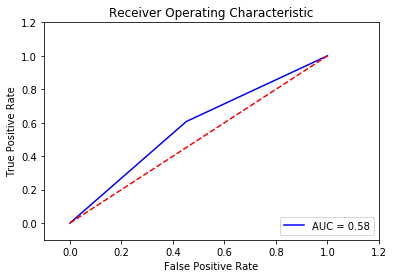

In [27]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
#Crossval score: para reorganizar y hacer el accuracy varias veces, así será más acertado el accuracy

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
mean_accuracy = cross_val_score(clf,X,y, cv=10, scoring='accuracy')

In [94]:
mean_accuracy.mean()

NameError: name 'mean_accuracy' is not defined

(array([ 1.,  1.,  0.,  1.,  1.,  2.,  2.,  0.,  1.,  1.]),
 array([ 0.53419494,  0.5425853 ,  0.55097566,  0.55936603,  0.56775639,
         0.57614676,  0.58453712,  0.59292748,  0.60131785,  0.60970821,
         0.61809857]),
 <a list of 10 Patch objects>)

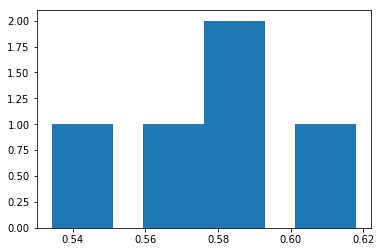

In [53]:
plt.hist(mean_accuracy) #Para ver los distintos accuracies que tiene el modelo

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
# Create the estimator and train it
clfdt = DecisionTreeClassifier(max_depth=50)

In [92]:
clfdt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [93]:
accuracy_score(y_test, clfdt.predict(X_test))

0.71350469196246435

In [95]:
from sklearn.model_selection import GridSearchCV

In [73]:
clfdt1 =GridSearchCV(estimator=DecisionTreeClassifier(min_samples_leaf=10), param_grid={'min_samples_leaf':np.arange(5,50)})

In [74]:
clfdt1.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [75]:
clfdt1.best_params_

{'min_samples_leaf': 49}

In [96]:
actual = y_test
predictions = clfdt.predict(X_test)

In [97]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

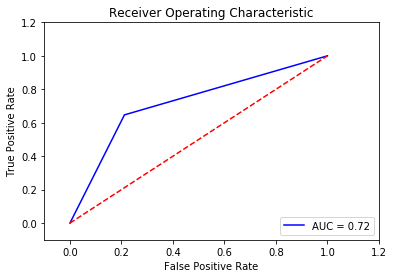

In [98]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Support Vector Machines

In [99]:
from sklearn.svm import SVC

In [103]:
clfSVM = SVC(kernel ='linear', degree=5)

In [104]:
clfSVM.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [105]:
accuracy_score(y_test, clfSVM.predict(X_test))

0.59983680130558958

In [ ]:
h = .01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(xx,yy, c=Z)

In [ ]:
plt.figure(figsize=(10,10))
    
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
#plt.plot(clf.)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], color="none",edgecolor="blue",s=200)
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.show()

In [ ]:
clf = SVC(kernel='linear', C=0.1)
clf.fit(X,y)

In [ ]:
a = cross_val_score(clf,X,y, cv=10, scoring='accuracy')
a.mean()

In [ ]:
clf1= GridSearchCV(estimator=SVC(kernel='poly', degree=5,C=1),param_grid={'degree':[2-20]})

In [ ]:
clf1.fit(X,y)

In [28]:
import seaborn as sns

In [29]:
df_cm = pd.DataFrame(
        confusion_matrix(clf.predict(X_test),y_test), index=["fast","slow"], columns=["fast","slow"], 
    )
fig = plt.figure()
sns.heatmap(df_cm, annot=True, fmt="d")

NameError: name 'confusion_matrix' is not defined

![alt text](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg "Logo Title Text 1")